In [8]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

% matplotlib inline

In [9]:
df = pd.read_csv("/content/drinks.csv", encoding='latin-1')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [11]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [12]:
df[df.duplicated()].count()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [13]:
#highest beer serving nation
df_beer = df.sort_values(by='beer_servings', ascending=False)
df_beer.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


In [7]:
px.bar(x='country', y='beer_servings', data_frame=df_beer.head(15), title="Top 15 Countries with highest beer serving")

In [15]:
#highest wine serving nation
df_wine = df.sort_values(by='wine_servings', ascending=False)
df_wine.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


In [16]:
px.bar(x='country', y='wine_servings', data_frame=df_beer.head(15), title="Top 15 Countries with highest wine serving")

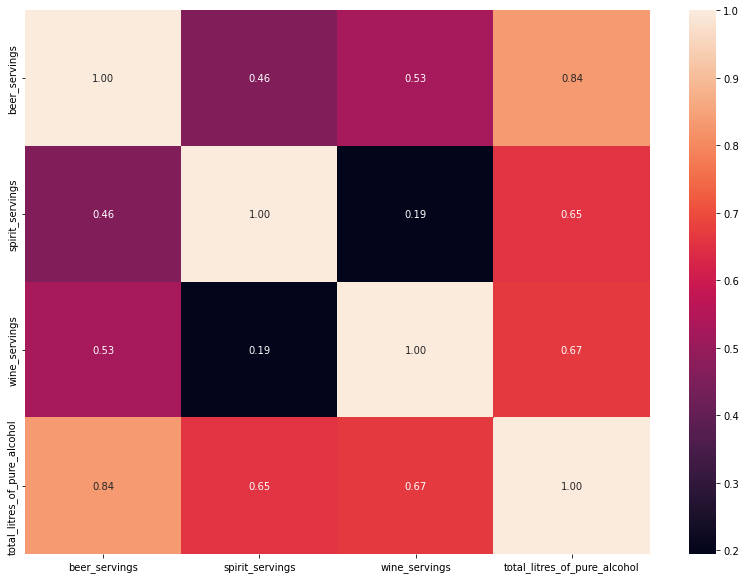

In [18]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

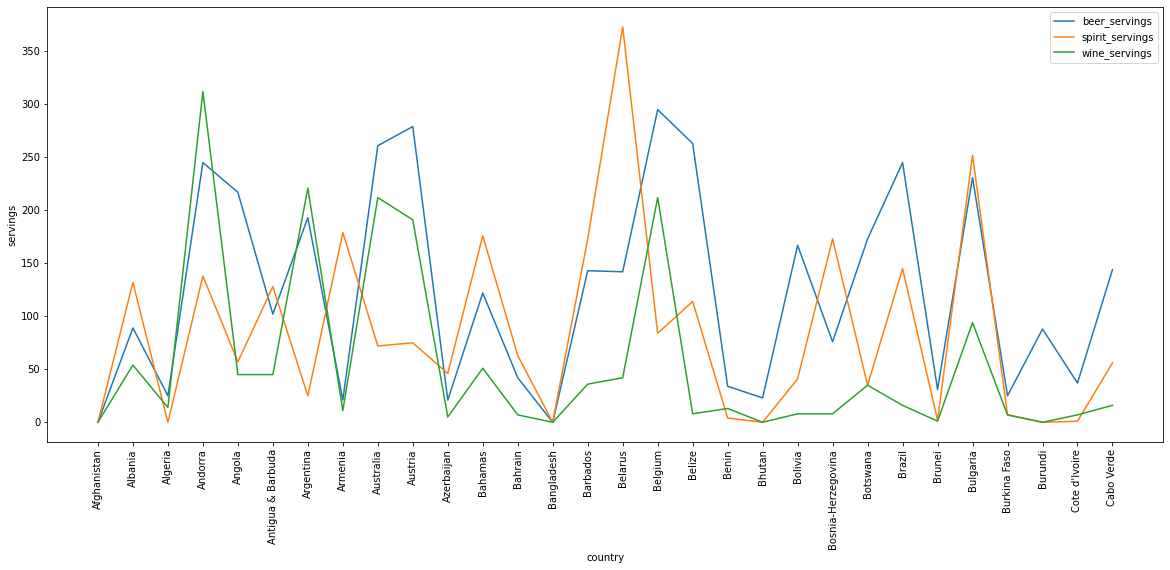

In [21]:
plt.figure(figsize=(20,8))
plt.plot(df['country'].head(30),df['beer_servings'].head(30))
plt.plot(df['country'].head(30),df['spirit_servings'].head(30))
plt.plot(df['country'].head(30),df['wine_servings'].head(30))
plt.xticks(rotation=90)
plt.xlabel("country")
plt.ylabel("servings")
plt.legend(['beer_servings','spirit_servings','wine_servings'])

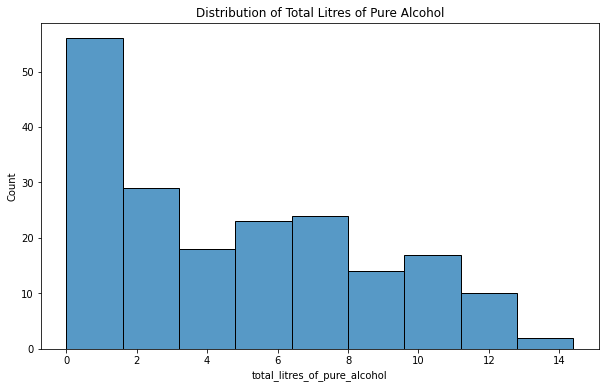

In [23]:
plt.figure(figsize = (10,6))
sns.histplot(df['total_litres_of_pure_alcohol'])
plt.title("Distribution of Total Litres of Pure Alcohol")
plt.show()

In [24]:
df['country'].loc[df['beer_servings']==df['beer_servings'].min()]

0           Afghanistan
13           Bangladesh
40         Cook Islands
46          North Korea
79                 Iran
90               Kuwait
97                Libya
103            Maldives
106    Marshall Islands
107          Mauritania
111              Monaco
128            Pakistan
147          San Marino
149        Saudi Arabia
158             Somalia
Name: country, dtype: object

In [26]:
px.line(x='country', y='beer_servings', data_frame=df, title="Relation of Beer serving and Countries")